# (Communicate Data Finding Slide-Deck : Ford GoBike System Data)
## by (ِAmr Fesal )

## Dataset Overview


> Ford GoBike System Data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading the dataset and describe its properties 

In [2]:
df_original = pd.read_csv('201902-fordgobike-tripdata.csv')
df_original.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [3]:
# high-level overview of data shape ,Dtypes and composition
print('THE DF Shape \n ',df_original.shape," \n ")

print('================== \n ')
      
print('THE DF DTypes \n ',df_original.dtypes," \n ")
print('================== \n ')



THE DF Shape 
  (183412, 16)  
 
 
THE DF DTypes 
  duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object  
 
 


In [4]:
# this returns useful descriptive statistics for each column of data
df_original.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
#checking the null values in data frame
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#showing the data duplications 
sum(df_original.duplicated())

0

In [7]:
#finding the unique values in dataset
df_original.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

## Data Cleaning

In [8]:
#creating a copy of the original dataset to  work on it 
df = df_original.copy()
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [9]:
#droppeding some columns that will not be used 
df.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df.head(1)


,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No


In [10]:
# Convert the start_timecolumn to date time datatype
df['start_time'] = pd.to_datetime(df['start_time'])
df.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No


In [11]:
#getting the day of the month .. new column ..
df['day_number'] = pd.DatetimeIndex(df['start_time']).day
#confirming the action of adding the Day column
df.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_number
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,28


In [12]:
#Getting the Day of the Week 
df['Day_Week_num'] = df['start_time'].apply(lambda time: time.dayofweek)
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Week_Day'] = df['Day_Week_num'].map(days)

In [13]:
#cheeking the Week_Day Series
df['Week_Day'] 

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
183407    Fri
183408    Fri
183409    Fri
183410    Fri
183411    Fri
Name: Week_Day, Length: 183412, dtype: object

In [14]:
#adding duration in minutes column
df["duration_min"]= df["duration_sec"]/60

In [15]:
# adding day time by hour
df['start_time_hour']=df['start_time'].dt.hour

In [16]:
#ensuring the new columns added 
df.head(2)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_number,Day_Week_num,Week_Day,duration_min,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,28,3,Thu,869.750000,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,No,28,3,Thu,708.683333,18


In [17]:
df.describe()

,duration_sec,bike_id,member_birth_year,day_number,Day_Week_num,duration_min,start_time_hour
count,183412.000000,183412.000000,175147.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,4472.906375,1984.806437,15.298977,2.632178,12.101307,13.458421
std,1794.389780,1664.383394,10.116689,8.028187,1.814786,29.906496,4.724978
min,61.000000,11.000000,1878.000000,1.000000,0.000000,1.016667,0.000000
25%,325.000000,3777.000000,1980.000000,8.000000,1.000000,5.416667,9.000000
50%,514.000000,4958.000000,1987.000000,15.000000,3.000000,8.566667,14.000000
75%,796.000000,5502.000000,1992.000000,22.000000,4.000000,13.266667,17.000000
max,85444.000000,6645.000000,2001.000000,28.000000,6.000000,1424.066667,23.000000


### The structure of your dataset

> There are 183412 trip in the dataset with 16 features (start and( end time,start and end station ID ,name,latitude and longitude) ,bike ID ,user type member birth year, gender  and bike share). some variables are numeric in nature, but the others are objecst
  


### The the main features of interest in our dataset


-  The number of trips based on the week days number
-  The average Time spent per trip in Minutes
-  The user type percentage and number of trips
-  The hourly number of trips across the day per user type
-  The relation betweeen user type and trip duration along the week days

In [18]:
#check the value count of week_day and month_day
print("The Week_Day Value Count \n ",df['Week_Day'].value_counts(sort=True))
print("\n =====================  \n ")
print("The Day number Value Count \n ",df['day_number'].value_counts(sort=True)) 

The Week_Day Value Count 
  Thu    35197
Tue    31813
Wed    29641
Fri    28981
Mon    26852
Sun    15523
Sat    15405
Name: Week_Day, dtype: int64

 
The Day number Value Count 
  28    9829
20    9667
21    9536
19    9467
7     9234
22    9204
6     9057
11    8681
5     8486
12    8473
27    7715
15    7288
25    7033
14    6598
8     6356
1     6133
18    5647
4     5491
23    5451
26    5387
24    4497
17    4225
16    3993
10    3960
2     3231
13    3202
3     2841
9     2730
Name: day_number, dtype: int64


In [19]:
#chhecking the time range for the Dataset 
print("the start time is",df.start_time.max())
print("\n =====================  \n ")
print("the start time is",df.start_time.min())

#so all Data set is in FEB

the start time is 2019-02-28 23:59:18.548000

 
the start time is 2019-02-01 00:00:20.636000


In [20]:
#showing the days of the month
df.day_number.unique()

array([28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12,
       11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [21]:
#Generating an array of month days 
arr_days=np.arange(1,29,1)
arr_days

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [22]:
# sort the days as categorival data
ordinal_days = {'day_number': [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]}

for i in ordinal_days:
    ordered_days = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_days[i])
    df[i] = df[i].astype( ordered_days)

In [23]:
#sort the week_days as categorival data
ordinal_weekdays = {'Week_Day': [ 'Mon','Tue','Wed','Thu','Fri','Sat','Sun']}

for i in ordinal_weekdays:
    ordered_days = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_weekdays[i])
    df[i] = df[i].astype( ordered_days)

In [24]:
df.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_number,Day_Week_num,Week_Day,duration_min,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,28,3,Thu,869.75,17


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


## The trips based on the week days number 

#### We have off peak during the weekend (trips number declines) .. while increase during the week working days

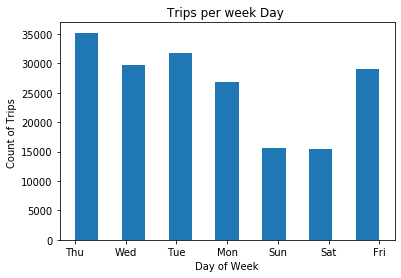

In [25]:
#plotting the average trips for days over week
default_color = sb.color_palette()[0]
plt.hist(data = df, x = 'Week_Day', color = default_color, bins =13)
plt.xlabel('Day of Week')
plt.ylabel('Count of Trips ')
plt.title('Trips per week Day ');


#### We have off peak during the weekend (trips number declines) .. while increase during the week working days

### ***************************

### Exploring the trips per days over month

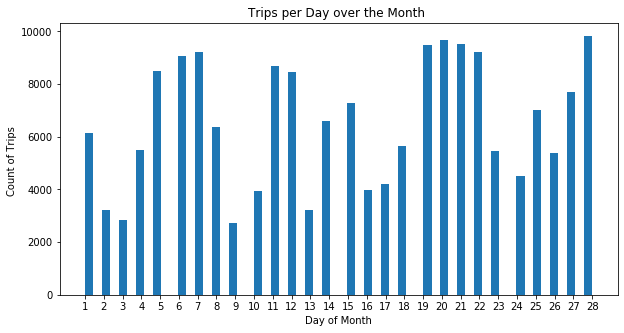

In [26]:
#plotting the average trip for days over month
default_color = sb.color_palette()[0]
plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'day_number', color = default_color, bins =60)
plt.xlabel('Day of Month')
plt.ylabel('Count of Trips ')
ticks=np.arange(1,29,1)
plt.xticks(ticks);
plt.title('Trips per Day over the Month ');

#### we have some peak days  6, 7 and from 19 to 23 and the max was 28 .. but it is completing the picture as it seems patterned  with high number for week working days while drop in numbers during weekend

# ***

## The Time spent per trip in Minutes

#### Most of trips duration  is between 5 and 15 minutes .. with increasing the duration .. decreases the number of trips which means that bikes are being used in not so long disatances 

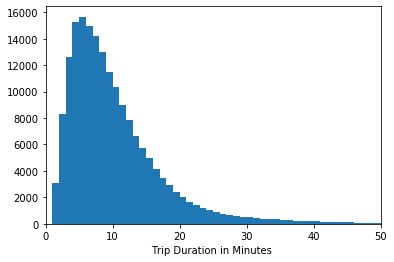

In [27]:
#Plotting of the average trip duration in minutes.
bins = np.arange(0, df['duration_min'].max()+10, 1)
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xlim([0,50])
plt.xlabel('Trip Duration in Minutes ')
plt.show()

#### Most of trips duration  is between 5 and 15 minutes .. with increasing the duration .. decreases the number of trips which means that bikes are being used in not so long disatances 

## ***

### Exploring the Gender type 

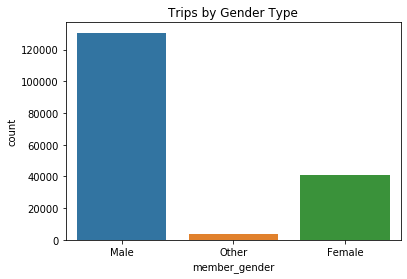

In [28]:
# plotting the customer type customers VS Subscriber
sb.countplot(data=df,x='member_gender')
plt.title('Trips by Gender Type');

#### We have 130K Male versus 40K females .. while we have about 5K  unrevealed gender 

# ***

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- 74% of users are males .. while females are 23% (of gender revealed) 
- There was unusal points for the duration (min), which in some cases lasted more than 1424 min 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
- the week working days have higher trips rate than the weekend
- adding the day_number to explore over month 
- adding duration in minutes to explore the duration in better way
- adding the week day to exlpore the trips for days over week

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

###  Exploring the user type ,percentage and number of trips

In [29]:
#exploring the customer types 
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [30]:
# calculating the Percentage % for the user type
customer = df.query('user_type == "Customer"')['bike_id'].count()
subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()

customer_rate = customer / df['bike_id'].count()
subscriber_rate= subscriber / df['bike_id'].count()

## The user type percentage and number of trips

#### We have number of subscribers eight times more than customers.. most of users have a membership (subscribed) 89%

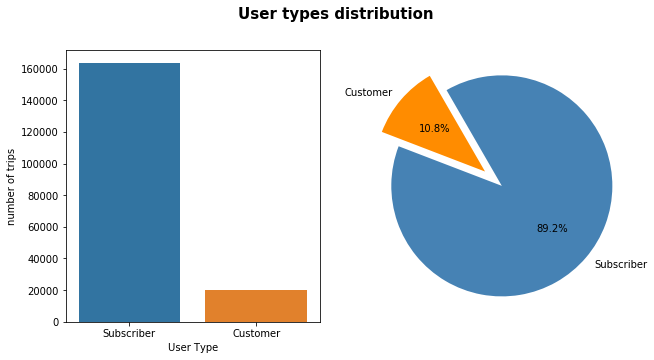

In [31]:
#plotting the the type of customer percentage and the trip numbers 

plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)

g = sb.countplot(data=df, x="user_type", order=df.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('number of trips')

# Pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_rate, subscriber_rate]
colors = ['darkorange', 'steelblue']
explode = (0, 0.2)
plt.pie(sizes, explode=explode, labels=labels,startangle=120,colors = colors,autopct='%1.1f%%')
plt.axis('equal')
plt.suptitle('User types distribution', y=1, fontsize=15, fontweight='bold');


#### We have number of subscribers eight times more than customers.. most of users have a membership (subscribed) 89%

# ***

## The hourly number of trips along the day per user type

####    The distributions of trips has two clear peaks which is bimodal for subscriber .. obviously it is the the start and end of the working hours , while customres are using the bikes mainly between 8:00 AM to 7:00 PM ,increasingly up to the  peak around 5 PM 

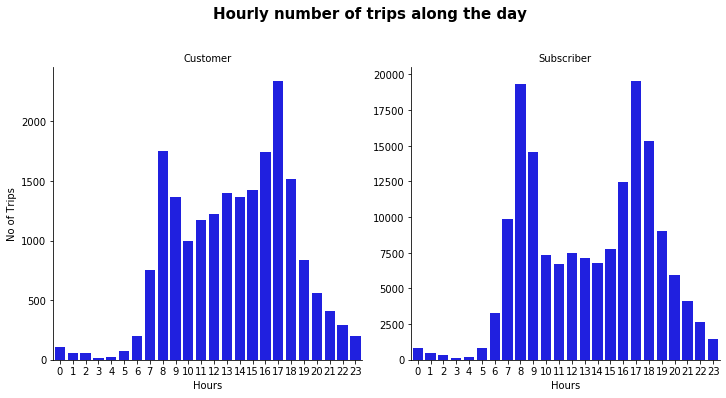

In [32]:
#plotting hourly number of trips along the day per user type

g = sb.catplot(data=df, x='start_time_hour', col="user_type", kind='count', sharey = False , color = "b")
g.set_axis_labels("Hours", "No of Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly number of trips along the day', y=1.1, fontsize=15, fontweight='bold');

####    The distributions of trips has two clear peaks which is bimodal for subscriber .. obviously it is the the start and end of the working hours , while customres are using the bikes mainly between 8:00 AM to 7:00 PM ,increasingly up to the  peak around 5 PM 

## ***

### Exploring duration distribution per user type

In [33]:
#the maximum duration per trip (min)
df.duration_min.max()

1424.0666666666666

<Figure size 1080x360 with 0 Axes>

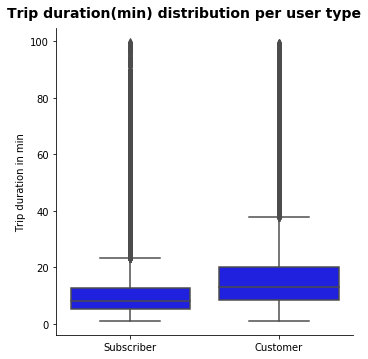

In [34]:
# code for the (boxplot) duration_min distribution per user type
plt.figure(figsize = [15, 5]);
df_min_60 = df.query('duration_min < 100')
g = sb.catplot(data=df_min_60, y='duration_min', x="user_type", kind='box',color = "b")
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration in min")
g.fig.suptitle('Trip duration(min) distribution per user type', y=1.03, fontsize=14, fontweight='semibold');

- the trip durations for customer are greater than the subscribers 
- the subscribers trip duration is about from 7 to 15 minutes for trip .. most probably for going to work
- the cutomers trip duration is about from 10 to 20 minutes for trip 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- The distributions of trips across the day has two  peaks which is bimodal for subscriber 
- Most of users have a membership (subscribed) 89%
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- The trip durations for customer are greater than the subscribers
- The subscribers trip duration is about from 7 to 15 minutes for trip while the cutomers trip duration is about from 10 to 20 minutes for trip
- Subscribers usually use the system mainly for business or daily purposes .. work/school.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### ***

##  The relation betweeen user type and trip duration along the week days

#### For trips lesss than  200 min .. it mostly rided by the subscribers ... however the long duration trips are being shared between customers and subscribers .. subscribers have some greater portion versus the shord perids
#### Customers trips have been increased in week end versus the working days

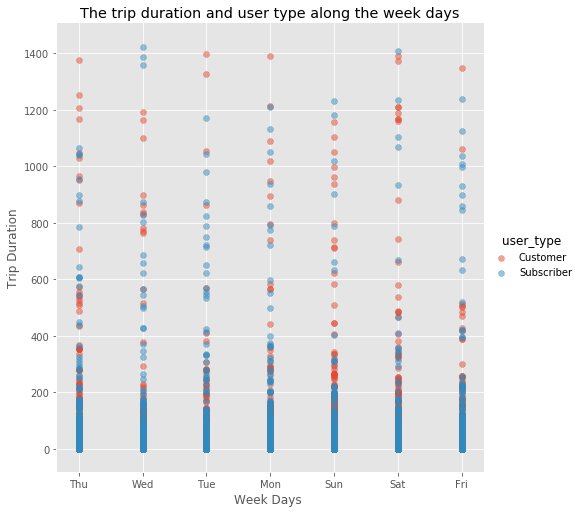

In [35]:
# The relation betweeen user type and trip duration(min) along the week days
plt.style.use('ggplot')
graph = sb.FacetGrid(data =  df, hue = 'user_type', height = 7)
graph.map(plt.scatter, 'Week_Day','duration_min', alpha = 1/2)
graph.add_legend()
plt.title('The trip duration and user type along the week days')
plt.xlabel('Week Days ')
plt.ylabel('Trip Duration');
#ticks=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#labels =['{}'.format(v) for v in ticks ]
#plt.xticks(ticks,labels);

#### For trips lesss than  200 min .. it mostly rided by the subscribers ... however the long duration trips are being shared between customers and subscribers .. subscribers have some greater portion versus the shord perids
#### Customers trips have been increased in week end versus the working days

### ***

### Exploring the hourly usage of the bikes per user type and gender

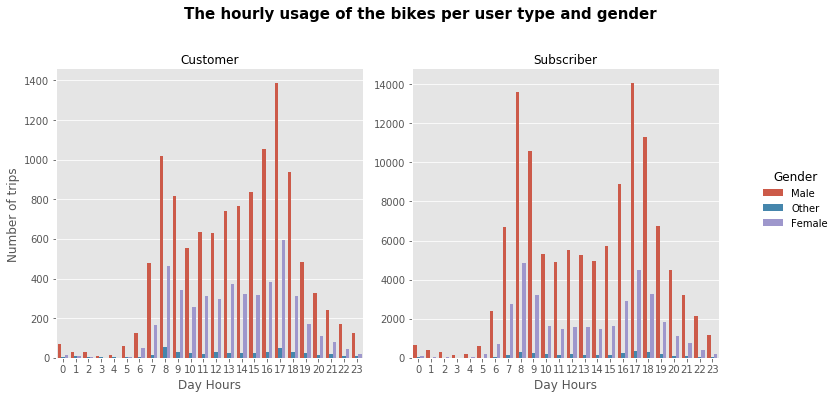

In [36]:
# The hourly usage of the bikes per user type and gender

graph= sb.catplot(data=df, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
graph.set_axis_labels("Day Hours", "Number of trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")
graph.fig.suptitle('The hourly usage of the bikes per user type and gender', y=1.1, fontsize=15, fontweight='bold');

#### Males and females are using the trips in same behaviour along the day however the males have higher usage in general
#### Males and females are using the trips in same behaviour even Customers or Subscribers

### ***

### Exploring the average trip time per gender along the week 

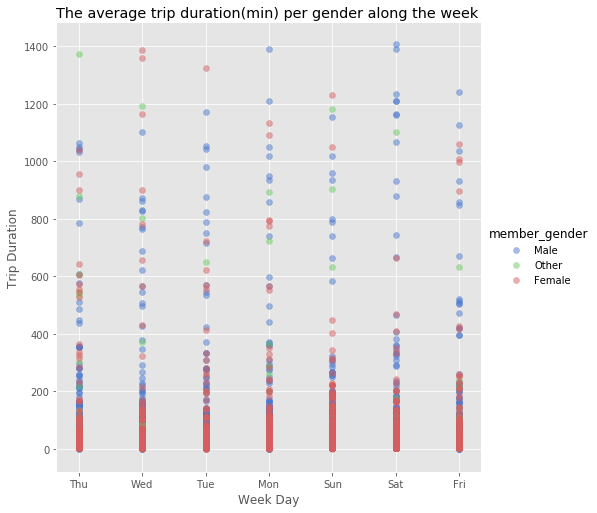

In [37]:
# The trip duration(min) per gender along the week 

plt.style.use('seaborn-muted')
#plt.style.use('seaborn-ticks')
graph= sb.FacetGrid(data =  df, hue = 'member_gender', height = 7)
graph.map(plt.scatter, 'Week_Day','duration_min', alpha = 1/2)
graph.add_legend()
plt.title('The average trip duration(min) per gender along the week ')
plt.xlabel('Week Day')
plt.ylabel('Trip Duration');

#### For trips less than  200 min .. it is mostly rided by females ... and the long duration trips are being  is mostly rided by males .. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- after investigation of bike hiring with different variables such as user type,gender , day hours and weekdays.The multivariate exploration here showed  that Males and females are using the trips in same behaviour along the day however the males have higher usage in general
- For trips lesss than 200 min .. it is mostly rided by females ... and the long duration trips are being is mostly rided by males

### Were there any interesting or surprising interactions between features?

> Males and females are using the trips along the day hours  in same behaviour even Customers or Subscribers

## Conclusion 

* This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco
Bay area.

* There are 183412 trip in the dataset with 16 features (start and( end time,start and end station ID ,name,latitude and longitude) ,bike ID ,user type member birth year, gender and bike share). some variables are numeric in nature, but the others are mixed as following

* Most of trips duration is between 5 and 15 minutes with trip is 12 min .. with increasing the duration .. decreases the number of trips which means that bikes are being used in not so long disatances  

* We have 130K Male versus 40K females .. while we have about 5K unrevealed gende

* we have User types distribution with 11% customers and 89% subscribers

# References

#### I have refered to alot of resoureces such as

- Udacity  material

- Youtube Videos
- Google .. alot of search 
- Kaggle and github
- Data camp , stack overflow , geek for geeks ....etc 

- python data science handbook
- Python , Pandas ,matplotlib documention 


## Example of links 

https://stackoverflow.com/questions/53281525/is-there-a-way-to-generate-markdown-files-from-jupyter-notebooks

https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
    
https://www.geeksforgeeks.org/matplotlib-pyplot-title-in-python/

https://nbconvert.readthedocs.io/en/latest/install.html


    
    
